<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/machine-learning-bootcamp/supervised/03_classification/06_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Podział na zbiór treningowy i testowy](#2)
4. [Standaryzacja cech](#3)
5. [Klasyfikator SVM - linear](#4)
6. [Klasyfikator SVM - rbf](#5)



# Przypadek dla dwóch klas 0 i 1.

### <a name='0'></a> Import bibliotek

In [62]:
print("############################################################")
print("Etap15. Odcinek: Maszyna wektorów nośnych - ćwiczenie")

# Wykład:

# Czasem zwiększenie wymiarów umożliwi oddzielenie danych linią,
# gdy zwiększamy z 1D na 2D lub płaszczyzną gdy zwiększamy 2D na 3D (psy i koty).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

############################################################
Etap15. Odcinek: Maszyna wektorów nośnych - ćwiczenie


### <a name='1'></a> Wygenerowanie danych

In [63]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

# cechy
data = all_data['data']
# target
target = all_data['target']
# nazwy cech
feature_names = all_data['feature_names']
# nazwa targetu
target_names = all_data['target_names']

# połączenie cech i targetu w jedną macierz numpy i zrobienie z niej df
df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# ogranicza zbiór danych tylko do dwóch klas: 0 i 1. Mamy 100 próbek łącznie.
df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [64]:
# sam wybieram dwie klasy 0 i 1 innym sposobem, korzystając z isin
moje_df = df[df["target"].isin([0.0, 1.0])]
moje_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [65]:
# wycina kolumny odpowiednio: petal length i sepal width .
# Robi z nich macierz np przy pomocy values i przypisuje je do tablicy numpy o nazwie data
data = df.iloc[:, [2, 1]].values

# sam robię innym sposobem data (korzystając z loc zamiast iloc)
print("Nazwy kolumn", df.columns)
moje_data = df.loc[:, ["petal length (cm)", "sepal width (cm)"]].values
print("moje_data =")
print(moje_data[:5])

# zamienia targety z float na int. Robi z nich macierz numpy
target = df['target'].apply(int).values

print()
print(f'data \n{data[:5]}\n')
print(f'target \n{target[:5]}')

Nazwy kolumn Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
moje_data =
[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

data 
[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

target 
[0 0 0 0 0]


### <a name='2'></a> Podział na zbiór treningowy i testowy

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

### <a name='3'></a> Standaryzacja cech

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# dopasowuję tylko do danych treningowych, żeby zapobiec wyciekowi danych ze zbioru testowego
scaler.fit(X_train)

# ale już transformuje dane treningowe i testowe
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <a name='4'></a> Klasyfikator SVM - linear

In [68]:
from sklearn.svm import SVC

# klasa Support Vector Classifier
# Jeśli parametr C<1 to poszerza pas, a jak C>1 to zawęża pas. Jądro liniowe.
classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
# model dopasował się w 100% (accuracy score). Nie dziwne bo na wykładzie te dane były seperowalne.
classifier.score(X_test, y_test)

1.0

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


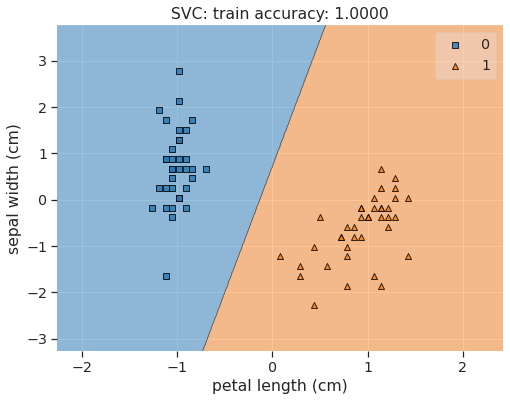

In [70]:
# wyświetla granice decyzyjne dla zbioru treningowego
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


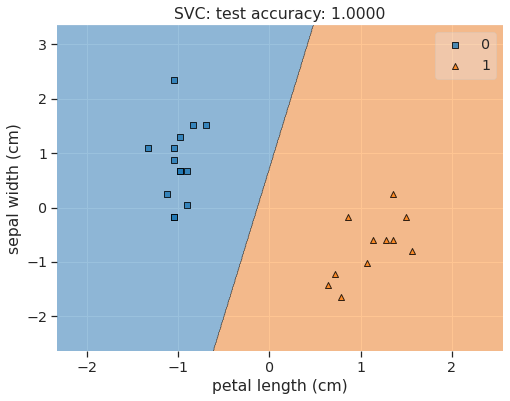

In [71]:
# wyświetla granice decyzyjne dla zbioru testowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='5'></a> Klasyfikator SVM - rbf (rozkład Gaussa)

In [72]:
# Jeśli parametr C<1 to poszerza pas, a jak C>1 to zawęża pas. Jądro gaussowskie.
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


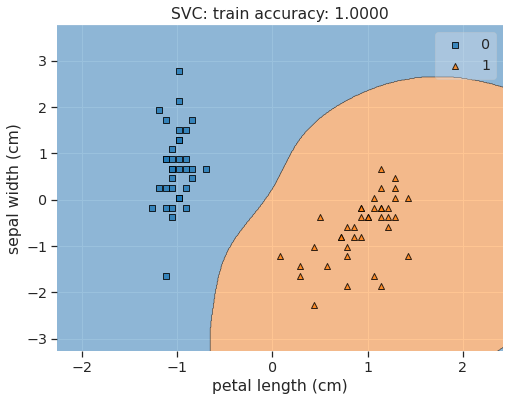

In [73]:
# wyświetla granice decyzyjne dla zbioru treningowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


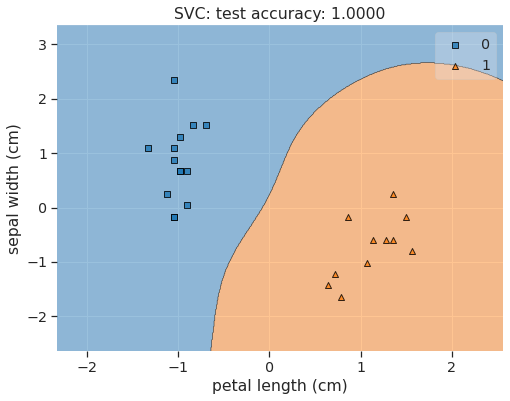

In [74]:
# wyświetla granice decyzyjne dla zbioru testowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

# Przypadek dla trzech klas 0, 1, 2

### <a name='0'></a> Import bibliotek

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Wygenerowanie danych

In [76]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

# cechy
data = all_data['data']
# target
target = all_data['target']
# nazwy cech
feature_names = all_data['feature_names']
# nazwa targetu
target_names = all_data['target_names']

# połączenie cech i targetu w jedną macierz numpy i zrobienie z niej df
df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# Tym razem nie ogranicza zbioru danych tylko do dwóch klas: 0 i 1. 
# Mamy 150 próbek łącznie.
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [77]:
# wycina kolumny odpowiednio: petal length i sepal width .
# Robi z nich macierz np przy pomocy values i przypisuje je do tablicy numpy o nazwie data
data = df.iloc[:, [2, 1]].values

# sam robię innym sposobem data (korzystając z loc zamiast iloc)
print("Nazwy kolumn", df.columns)
moje_data = df.loc[:, ["petal length (cm)", "sepal width (cm)"]].values
print("moje_data =")
print(moje_data[:5])

# zamienia targety z float na int. Robi z nich macierz numpy
target = df['target'].apply(int).values

print()
print(f'data \n{data[:5]}\n')
print(f'target \n{target[:5]}')

Nazwy kolumn Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
moje_data =
[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

data 
[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

target 
[0 0 0 0 0]


### <a name='2'></a> Podział na zbiór treningowy i testowy

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

### <a name='3'></a> Standaryzacja cech

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# dopasowuję tylko do danych treningowych, żeby zapobiec wyciekowi danych ze zbioru testowego
scaler.fit(X_train)

# ale już transformuje dane treningowe i testowe
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <a name='4'></a> Klasyfikator SVM - linear

In [80]:
from sklearn.svm import SVC

# klasa Support Vector Classifier
# Jeśli parametr C<1 to poszerza pas, a jak C>1 to zawęża pas. Jądro liniowe.
classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
# model dopasował się mniej niżw 100% (accuracy score)
classifier.score(X_test, y_test)

0.9736842105263158

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


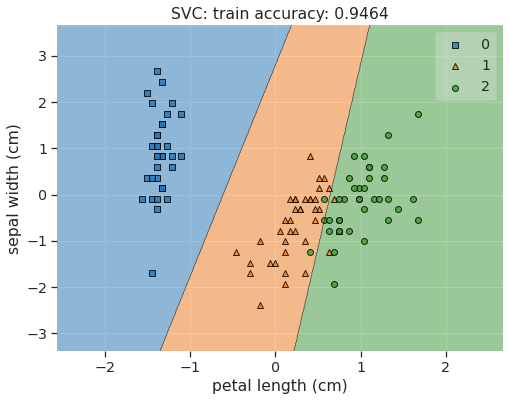

In [82]:
# wyświetla granice decyzyjne dla zbioru treningowego
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


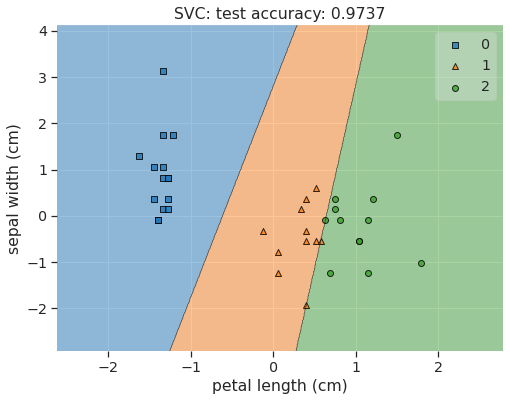

In [83]:
# wyświetla granice decyzyjne dla zbioru testowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='5'></a> Klasyfikator SVM - rbf (rozkład Gaussa)

In [84]:
# Jeśli parametr C<1 to poszerza pas, a jak C>1 to zawęża pas. Jądro gaussowskie.
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9736842105263158

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


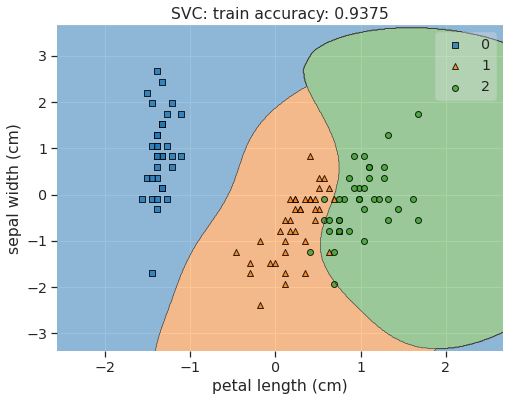

In [85]:
# wyświetla granice decyzyjne dla zbioru treningowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


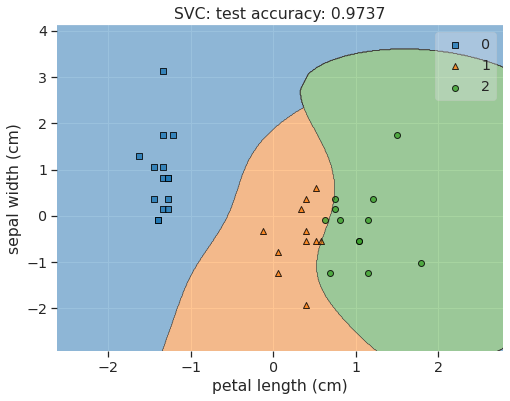

In [86]:
# wyświetla granice decyzyjne dla zbioru testowego
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()